In [1]:
import numpy as np
true_b = 1
true_w = 2
N =200
np.random.seed(42)
x = np.random.randn(N,1)
e = np.random.randn(N,1) * .2
y = true_b + true_w * x + e
y.shape

(200, 1)

In [2]:
import torch

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
x_tensor = torch.tensor(x,dtype = torch.float32, device = device)
y_tensor = torch.tensor(y, dtype =torch.float32, device = device )

In [5]:
x_tensor.device

device(type='cuda', index=0)

In [6]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad  = True, device = device)
w = torch.randn(1, requires_grad = True,  device = device)
b,w

(tensor([0.1940], device='cuda:0', requires_grad=True),
 tensor([0.1391], device='cuda:0', requires_grad=True))

In [7]:
y_pred = b + w * x_tensor

In [8]:
y_pred

tensor([[ 0.2631],
        [ 0.1748],
        [ 0.2841],
        [ 0.4059],
        [ 0.1614],
        [ 0.1614],
        [ 0.4137],
        [ 0.3008],
        [ 0.1287],
        [ 0.2695],
        [ 0.1295],
        [ 0.1292],
        [ 0.2277],
        [-0.0722],
        [-0.0460],
        [ 0.1158],
        [ 0.0531],
        [ 0.2377],
        [ 0.0677],
        [-0.0025],
        [ 0.3979],
        [ 0.1626],
        [ 0.2034],
        [-0.0042],
        [ 0.1183],
        [ 0.2095],
        [ 0.0339],
        [ 0.2463],
        [ 0.1104],
        [ 0.1534],
        [ 0.1103],
        [ 0.4517],
        [ 0.1921],
        [ 0.0469],
        [ 0.3085],
        [ 0.0242],
        [ 0.2231],
        [-0.0786],
        [ 0.0092],
        [ 0.2214],
        [ 0.2968],
        [ 0.2179],
        [ 0.1779],
        [ 0.1521],
        [-0.0117],
        [ 0.0939],
        [ 0.1299],
        [ 0.3411],
        [ 0.2418],
        [-0.0513],
        [ 0.2391],
        [ 0.1404],
        [ 0.

In [9]:
y_pred.requires_grad

True

In [10]:
torch.manual_seed(42)
b = torch.randn(1,requires_grad=True,device = device)
w = torch.randn(1,requires_grad=True,device = device)
b,w

(tensor([0.1940], device='cuda:0', requires_grad=True),
 tensor([0.1391], device='cuda:0', requires_grad=True))

In [11]:
losses = []
epoch = 50
lr = .5
y_pred = b + w * x_tensor
error = y_pred - y_tensor
loss = .5 * (error**2).mean()
loss.backward()
with torch.no_grad():
  w -= lr * w.grad
  b -= lr * b.grad
w.grad.zero_()
b.grad.zero_()


tensor([0.], device='cuda:0')

In [12]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=b611c29382c85546b4b20917ea62e4924689a549cea5da71cbbe7b89e07acc03
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [13]:
from torchviz import make_dot

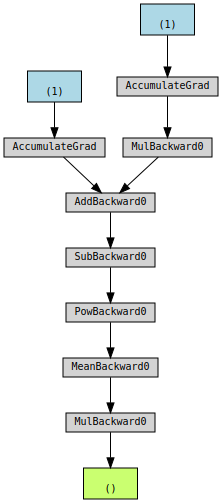

In [14]:
make_dot(loss)

Mwmory required for deep learning:

# Train:
Parameters: 500M f32-> 2G Gradian: 500M f32 -> 2G Model process: 2G optimizer step: 3G 9G for train

Valid: Parameters: 500M f32-> 2G Model process: 2G 4 G for validatrion

In [15]:
loss.detach().cpu().item()

1.8242034912109375

In [16]:
losses.append(loss)

In [17]:
losses

[tensor(1.8242, device='cuda:0', grad_fn=<MulBackward0>)]

In [18]:
from torch import optim

In [19]:
torch.manual_seed(42)
b = torch.randn(1,requires_grad=True,device = device)
w = torch.randn(1,requires_grad=True,device = device)

lr = .5
optimizer = optim.SGD([b,w], lr = lr)
losses = []
epoch = 50

for _ in range (epoch):
  y_pred = b + w * x_tensor
  error = y_pred - y_tensor
  loss = .5*(error ** 2).mean()
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().cpu().item())

w,b

(tensor([2.0202], device='cuda:0', requires_grad=True),
 tensor([1.0180], device='cuda:0', requires_grad=True))

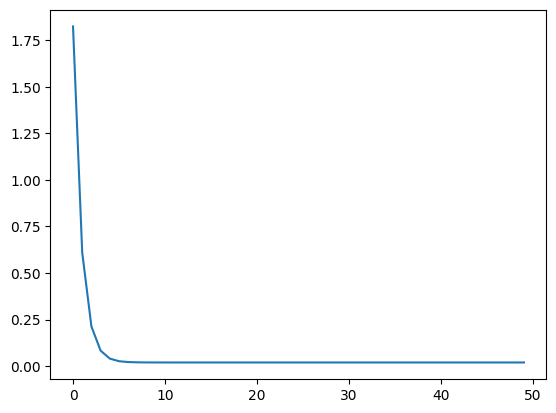

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(epoch),losses)
plt.show()

In [21]:
import torch.nn as nn

In [22]:
loss_fn = nn.MSELoss()

In [23]:
torch.manual_seed(42)
b = torch.randn(1,requires_grad=True,device = device, dtype = torch.float16)
w = torch.randn(1,requires_grad=True,device = device, dtype = torch.float16)


loss_fn = nn.MSELoss()
lr = .5
optimizer = optim.SGD([b,w],lr = lr)
losses = []
epoch = 50


for _ in range(epoch):
  y_pred = b + w * x_tensor
  loss = loss_fn(y_pred, y_tensor)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().cpu().item())

w,b

(tensor([2.0195], device='cuda:0', dtype=torch.float16, requires_grad=True),
 tensor([1.0176], device='cuda:0', dtype=torch.float16, requires_grad=True))

In [24]:
class ManualRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.b = nn.Parameter(torch.randn(1,requires_grad = True , dtype = torch.float16))
    self.w = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float16))

  def forward(self,x):
    return self.b + self.w * x

In [25]:
torch.manual_seed(42)
model = ManualRegression().to(device)

In [26]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', dtype=torch.float16, requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', dtype=torch.float16, requires_grad=True)]

In [27]:
model.state_dict()

OrderedDict([('b', tensor([0.3367], device='cuda:0', dtype=torch.float16)),
             ('w', tensor([0.1288], device='cuda:0', dtype=torch.float16))])

In [28]:
loss_fn = nn.MSELoss()
lr = .5
optimizer = optim.SGD([b,w],lr = lr)
losses = []
epoch = 50


for _ in range(epoch):
  model.train()
  y_pred = model(x_tensor)
  loss = loss_fn(y_pred, y_tensor)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().cpu().item())

In [29]:
class ManualRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer= nn.Linear(in_features = 1 , out_features = 1 , bias = True)

  def forward(self,x):
    return self.layer(x)

In [30]:
model = ManualRegression().to(device)
list(model.parameters())

[Parameter containing:
 tensor([[-0.2191]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.2018], device='cuda:0', requires_grad=True)]

In [31]:
loss_fn = nn.MSELoss()
lr = .5
optimizer = optim.SGD(model.parameters(),lr = lr)
losses = []
epoch = 50


for _ in range(epoch):
  model.train()
  y_pred = model(x_tensor)
  loss = loss_fn(y_pred, y_tensor)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().cpu().item())

In [32]:
model.eval()
y_pred = model(x_tensor)
loss = loss_fn(y_pred, y_tensor)


In [33]:
loss.detach().cpu().item()

0.038421228528022766